# Part I - (Dataset Exploration - Filghts)
## by (Ezzudin Tomizi)

## Introduction
This extensive dataset compiles detailed information on flight travels within the USA specifically for January 2025. It comprises a total of 539,747 individual flight records across 23 distinct columns, offering a comprehensive view of various aspects of air transportation during this period.


## Preliminary Wrangling


In [81]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [82]:
df = pd.read_csv("T_ONTIME_REPORTING.csv")
df.head(10)

,YEAR,MONTH,DAY_OF_WEEK,ORIGIN,ORIGIN_STATE_ABR,DEST,DEST_STATE_NM,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,...,CANCELLED,CANCELLATION_CODE,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2025,1,1,ABE,PA,CLT,North Carolina,NaN,NaN,NaN,...,1.0,B,NaN,481.0,2,NaN,NaN,NaN,NaN,NaN
1,2025,1,1,ABE,PA,CLT,North Carolina,0.0,0.0,11.0,...,0.0,NaN,110.0,481.0,2,NaN,NaN,NaN,NaN,NaN
2,2025,1,1,ABE,PA,CLT,North Carolina,0.0,0.0,11.0,...,0.0,NaN,91.0,481.0,2,NaN,NaN,NaN,NaN,NaN
3,2025,1,1,ABE,PA,CLT,North Carolina,0.0,0.0,12.0,...,0.0,NaN,98.0,481.0,2,NaN,NaN,NaN,NaN,NaN
4,2025,1,1,ABE,PA,CLT,North Carolina,0.0,0.0,12.0,...,0.0,NaN,84.0,481.0,2,NaN,NaN,NaN,NaN,NaN
5,2025,1,1,ABE,PA,CLT,North Carolina,0.0,0.0,14.0,...,0.0,NaN,91.0,481.0,2,NaN,NaN,NaN,NaN,NaN
6,2025,1,1,ABE,PA,CLT,North Carolina,0.0,0.0,22.0,...,0.0,NaN,88.0,481.0,2,NaN,NaN,NaN,NaN,NaN
7,2025,1,1,ABE,PA,CLT,North Carolina,0.0,0.0,24.0,...,0.0,NaN,93.0,481.0,2,NaN,NaN,NaN,NaN,NaN
8,2025,1,1,ABE,PA,CLT,North Carolina,0.0,0.0,29.0,...,0.0,NaN,100.0,481.0,2,NaN,NaN,NaN,NaN,NaN
9,2025,1,1,ABE,PA,CLT,North Carolina,11.0,0.0,14.0,...,0.0,NaN,81.0,481.0,2,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264508 entries, 0 to 264507
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 264508 non-null  int64  
 1   MONTH                264508 non-null  int64  
 2   DAY_OF_WEEK          264508 non-null  int64  
 3   ORIGIN               264508 non-null  object 
 4   ORIGIN_STATE_ABR     264507 non-null  object 
 5   DEST                 264507 non-null  object 
 6   DEST_STATE_NM        264507 non-null  object 
 7   DEP_DELAY_NEW        256203 non-null  float64
 8   DEP_DEL15            256203 non-null  float64
 9   TAXI_OUT             256070 non-null  float64
 10  TAXI_IN              255888 non-null  float64
 11  ARR_DELAY_NEW        255511 non-null  float64
 12  ARR_DEL15            255511 non-null  float64
 13  CANCELLED            264507 non-null  float64
 14  CANCELLATION_CODE    8483 non-null    object 
 15  AIR_TIME         

In [83]:
df['DAY_OF_WEEK'].replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday',9:"Unkown"},inplace=True)
df['DAY_OF_WEEK'].unique()

/tmp/ipython-input-83-2011994705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DAY_OF_WEEK'].replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday',9:"Unkown"},inplace=True)


array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [84]:
df['CANCELLATION_CODE'].replace({'A':'Carrier','B':'Weather','C':'National Air System','D':'Security'},inplace=True)
df['CANCELLATION_CODE'].unique()

/tmp/ipython-input-84-176404838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CANCELLATION_CODE'].replace({'A':'Carrier','B':'Weather','C':'National Air System','D':'Security'},inplace=True)


array(['Weather', nan, 'National Air System', 'Carrier', 'Security'],
      dtype=object)

In [85]:
df['DISTANCE_GROUP'].replace({
    1:'Less Than 250 miles',
    2:'250-499 miles',
    3:'500-749 miles',
    4:'750-999 miles',
    5:'1000-1249 miles',
    6:'1250-1499 miles',
    7:'1500-1749 miles',
    8:'1750-1999 miles',
    9:'2000-2249 miles',
    10:'Greater Than 2250 miles'
},inplace=True)
df['DISTANCE_GROUP'].unique()

/tmp/ipython-input-85-119069021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DISTANCE_GROUP'].replace({


array(['250-499 miles', '1000-1249 miles', '750-999 miles',
       'Less Than 250 miles', '1250-1499 miles', '500-749 miles',
       '1500-1749 miles', '2000-2249 miles', 'Greater Than 2250 miles',
       11, '1750-1999 miles'], dtype=object)

In [87]:
df.to_csv("data.csv")

In [ ]:
df.describe()

,YEAR,MONTH,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,264508.0,264508.0,256203.000000,256203.000000,256070.000000,255888.000000,255511.000000,255511.000000,264507.000000,255511.000000,264507.000000,44177.000000,44177.000000,44177.000000,44177.000000,44177.000000
mean,2025.0,1.0,12.710878,0.167598,18.868208,8.175456,12.784557,0.172897,0.032071,116.739643,829.876056,25.399439,6.342260,14.018743,0.096974,22.959028
std,0.0,0.0,50.158214,0.373509,10.865296,6.583852,49.581055,0.378159,0.176189,71.789335,594.687550,77.088012,46.044055,29.292024,2.167861,55.520949
min,2025.0,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025.0,1.0,0.000000,0.000000,12.000000,4.000000,0.000000,0.000000,0.000000,64.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2025.0,1.0,0.000000,0.000000,16.000000,6.000000,0.000000,0.000000,0.000000,100.000000,685.000000,2.000000,0.000000,2.000000,0.000000,0.000000
75%,2025.0,1.0,5.000000,0.000000,22.000000,10.000000,5.000000,0.000000,0.000000,148.000000,1068.000000,23.000000,0.000000,19.000000,0.000000,25.000000
max,2025.0,1.0,3298.000000,1.000000,182.000000,204.000000,3282.000000,1.000000,1.000000,706.000000,5095.000000,3282.000000,1765.000000,1040.000000,135.000000,2063.000000


### What is the structure of your dataset?

> The columns in the dataset include:
* YEAR: Year of the flight (Integer)
* MONTH: Month of the flight (Integer)
* DAY_OF_WEEK: Day of the week (Integer)
* ORIGIN: Origin airport (Object)
* ORIGIN_STATE_ABR: Abbreviation of the origin state (Object)
* DEST: Destination airport (Object)
* DEST_STATE_NM: Name of the destination state (Object)
* DEP_DELAY_NEW: New departure delay in minutes (Float)
* DEP_DEL15: Departure delay indicator (1 if delay > 15 minutes, 0 otherwise) (Float)
* TAXI_OUT: Taxi-out time in minutes (Float)
* TAXI_IN: Taxi-in time in minutes (Float)
* ARR_DELAY_NEW: New arrival delay in minutes (Float)
* ARR_DEL15: Arrival delay indicator (1 if delay > 15 minutes, 0 otherwise) (Float)
* CANCELLED: Cancellation indicator (1 if cancelled, 0 otherwise) (Float)
* CANCELLATION_CODE: Reason for cancellation (e.g., A - Carrier, B - Weather) (Object)
* AIR_TIME: Air time in minutes (Float)
* DISTANCE: Distance in miles (Float)
* DISTANCE_GROUP: Distance group (Integer)
* CARRIER_DELAY: Carrier-caused delay in minutes (Float)
* WEATHER_DELAY: Weather-caused delay in minutes (Float)
* NAS_DELAY: National Air System (NAS) caused delay in minutes (Float)
* SECURITY_DELAY: Security-caused delay in minutes (Float)
* LATE_AIRCRAFT_DELAY: Late aircraft-caused delay in minutes (Float)



## Univariate Exploration


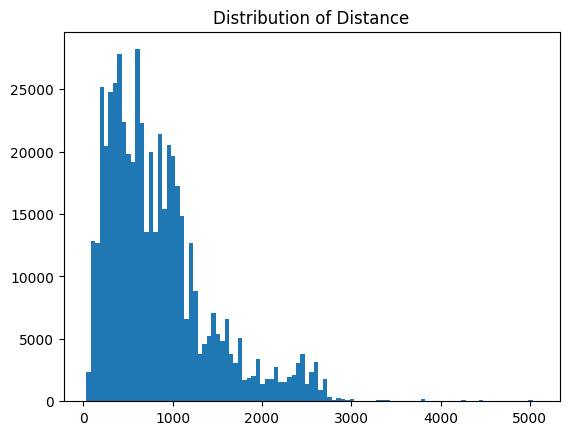

In [ ]:
bins = np.arange(df['DISTANCE'].min(),df['DISTANCE'].max()+0.5,50)
plt.hist(data=df,x="DISTANCE",bins=bins);
plt.title("Distribution of Distance");

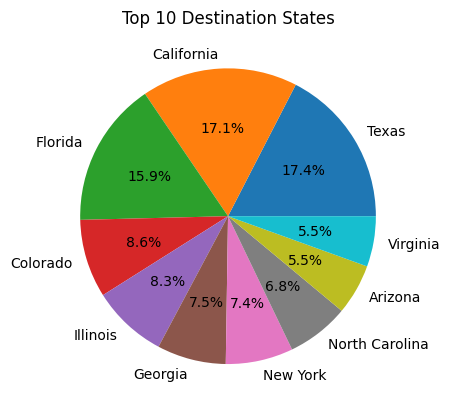

In [ ]:
data = df['DEST_STATE_NM'].value_counts().head(10)
plt.pie(data,labels=data.index,autopct='%1.1f%%');
plt.title("Top 10 Destination States");

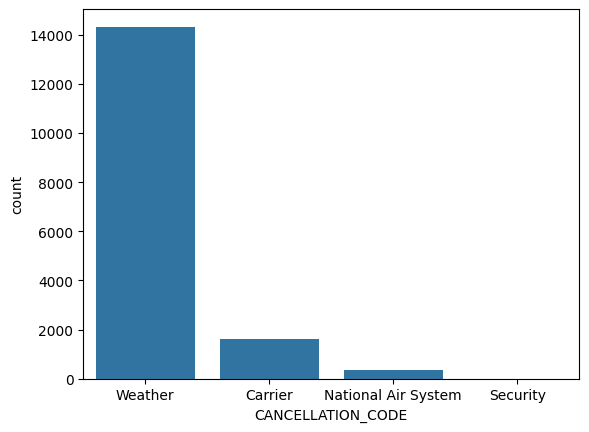

In [ ]:
sb.countplot(data=df,x="CANCELLATION_CODE",order=df['CANCELLATION_CODE'].value_counts().index);

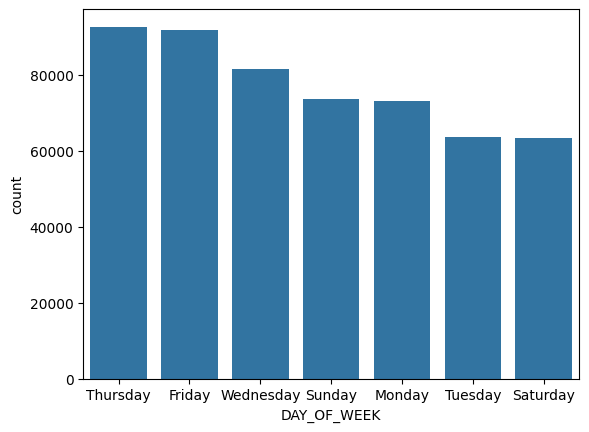

In [88]:
sb.countplot(data=df,x="DAY_OF_WEEK",order=df['DAY_OF_WEEK'].value_counts().index);

> The histogram above, which illustrates the distribution of flight distances, reveals **that the majority of flights passing through JAN cover relatively short distances**, primarily falling within the **0 to 1000-mile range**. This pattern indicates that JAN is more commonly used for short-haul travel rather than long-distance routes.

In addition to this, the data shows that **around 14,000 flights** have been canceled, **with the primary reason being adverse weather conditions in the JAN area.** Weather-related disruptions appear to play a significant role in the operational challenges at this airport.

Moreover, the accompanying count plot highlights **a noticeable increase in flight activity on Thursdays and Fridays.** This trend suggests that air travel through JAN tends to rise as the weekend approaches, reflecting higher passenger demand during the latter part of the week, possibly due to leisure travel or weekend getaways.

## Bivariate Exploration


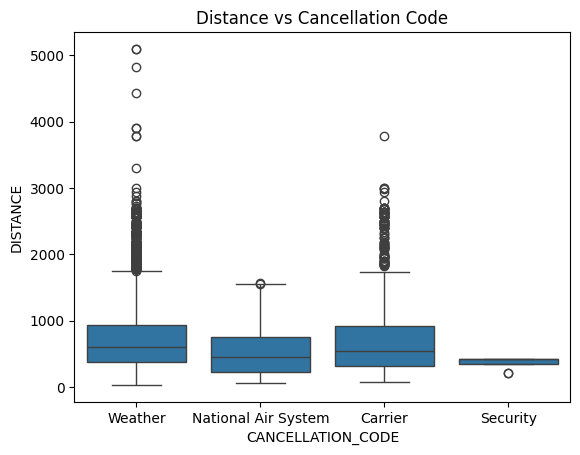

In [ ]:
sb.boxplot(data=df,x="CANCELLATION_CODE",y="DISTANCE");
plt.title("Distance vs Cancellation Code");

The analysis of the **CANCELLATION\_CODE** and **DISTANCE** using a box plot reveals the presence of several outliers, particularly for cancellations due to weather and carrier-related issues. Despite these outliers, the visualization helps uncover meaningful patterns in cancellations associated with the national air system and security-related issues. Specifically, flights canceled due to problems within the national air system typically fall within a distance range of 0 to 1800 miles, with a median distance of approximately 500 miles. In contrast, cancellations attributed to security concerns are relatively rare, and the affected flights generally have distances under 1000 miles. This suggests that security-related disruptions tend to occur on shorter routes and are less frequent compared to other cancellation causes.


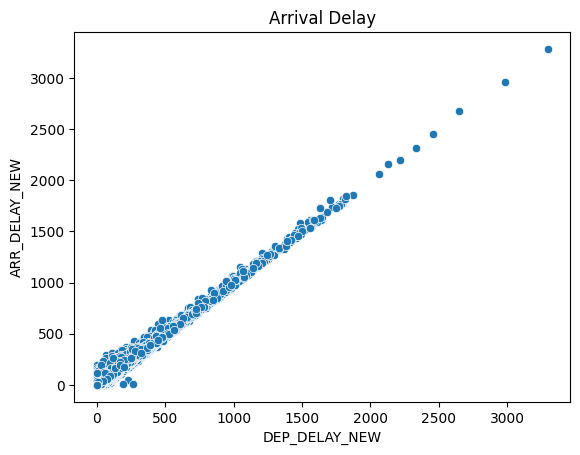

In [ ]:
sb.scatterplot(data=df,x="DEP_DELAY_NEW",y="ARR_DELAY_NEW");
plt.title("Arrival Delay");

The scatterplot illustrates a clear **linear relationship between departure delays and arrival delays**, indicating that as departure delays increase, arrival delays tend to increase proportionally as well.

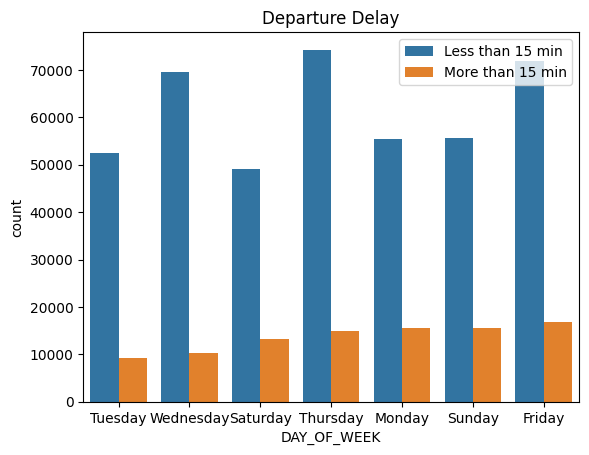

In [ ]:
sb.countplot(data=df,x="DAY_OF_WEEK",hue="DEP_DEL15",order=df.groupby(['DAY_OF_WEEK','DEP_DEL15']).size().sort_values().index.get_level_values(0));
plt.legend(labels=["Less than 15 min","More than 15 min"]);
plt.title("Departure Delay");

> The bar chart below indicates **that departure delays tend to increase on Fridays and Sundays**, while they are at their lowest on Tuesdays and Wednesdays. This pattern suggests **a correlation between higher passenger traffic toward the weekend and increased delays**, whereas midweek days experience fewer disruptions and smoother operations.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


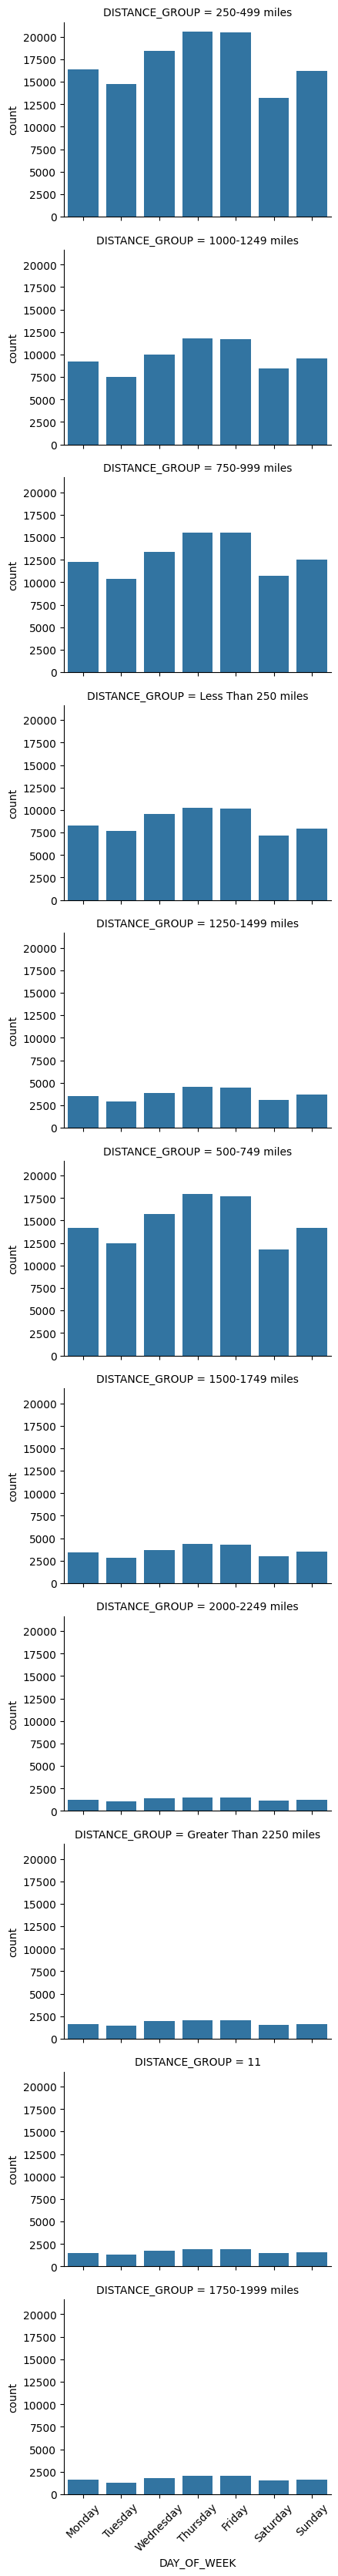

In [ ]:
g = sb.FacetGrid(data=df,row="DISTANCE_GROUP",aspect=1.5)
g.map(sb.countplot,"DAY_OF_WEEK");
plt.xticks(rotation=45);

> A clear observation from the data is that the majority of flights operating **through JAN fall within a distance of less than 1800 miles**, which aligns with the previously discussed distance distribution. **This indicates that JAN primarily serves as a hub for short- to medium-haul flights rather than long-distance travel.** The concentration of flights within this distance range suggests a regional focus, catering mostly to domestic routes or nearby destinations, and reflects the airport’s operational role within the broader air transportation network.


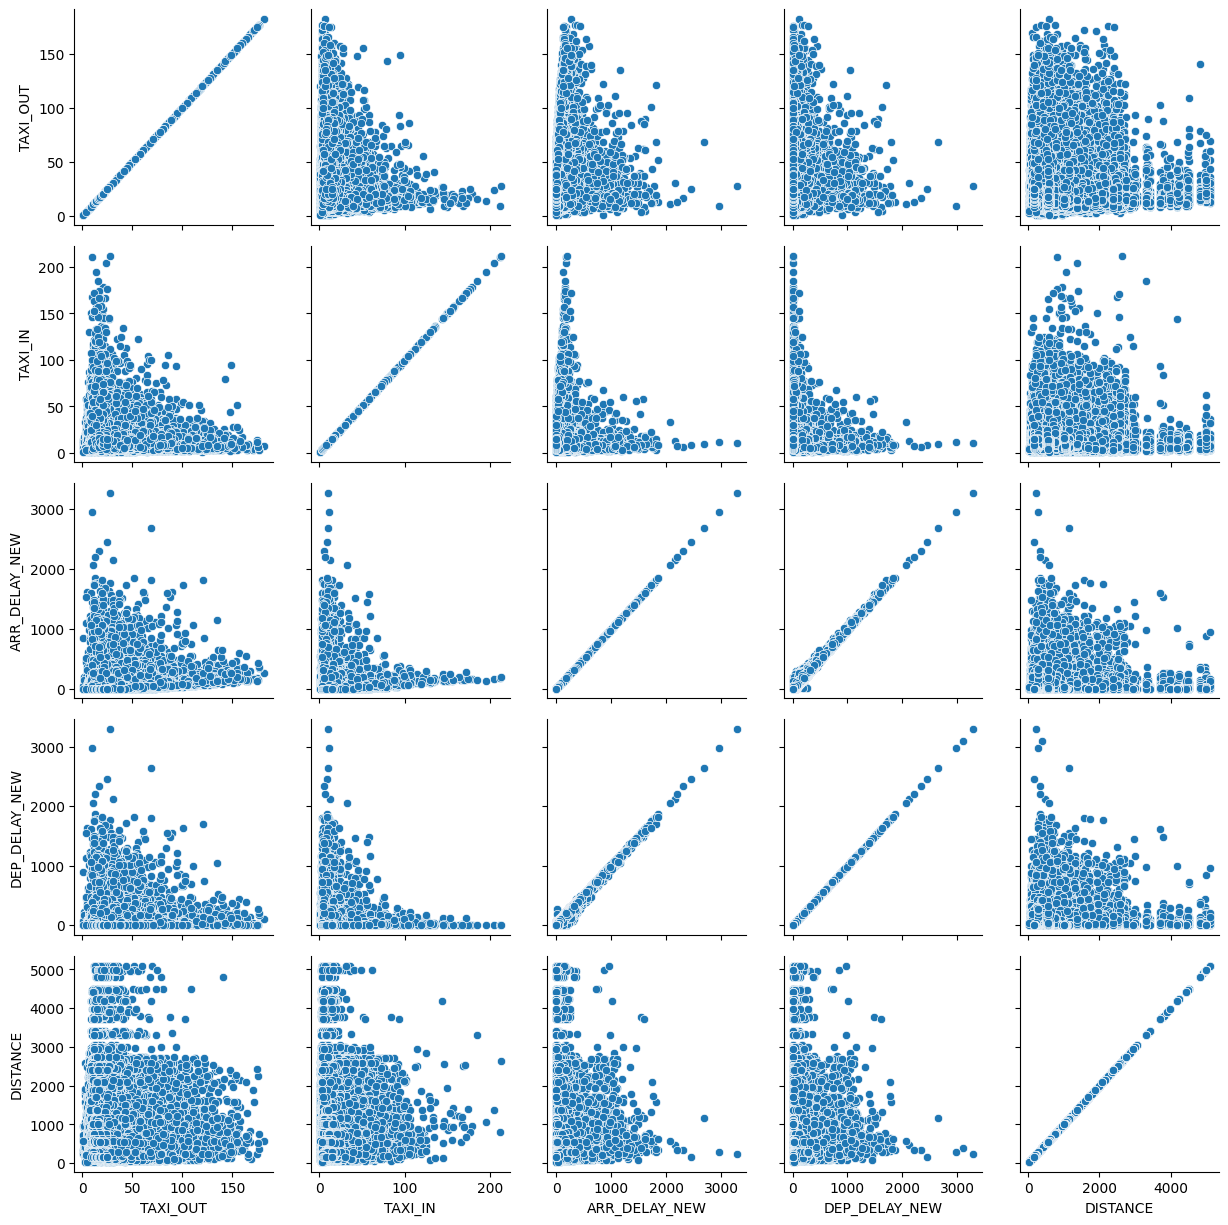

In [ ]:
vars = ["TAXI_OUT","TAXI_IN","ARR_DELAY_NEW","DEP_DELAY_NEW",'DISTANCE']
g = sb.PairGrid(data=df,vars=vars)
g.map(sb.scatterplot);

> The plot matrix does not reveal any clear or strong relationships among the variables. While some weak trends may be present, no definitive or consistent patterns can be concluded from the visualized data.


## Conclusions
>This dataset provides a comprehensive overview of commercial flights within the U.S. during January 2025, with over half a million records. Through the analysis, we gain key insights into delays and cancellations, uncovering patterns related to geography, weekdays, and causes. The most influential factors for delays and cancellations include weather conditions, carrier issues, and national air system constraints. By exploring these variables, we can better understand operational bottlenecks in the aviation system and identify areas for potential improvements in scheduling, resource management, and passenger experience.
